In [1]:
import pandas as pd

In [2]:
'''
Acknowledgements
Firstly, there is battles.csv which contains Chris Albon's "The
War of the Five Kings" Dataset, which can be found here:
https://github.com/chrisalbon/war_of_the_five_kings_dataset . Its a
great collection of all of the battles in the series.

Secondly we have character-deaths.csv from Erin Pierce and Ben
Kahle. This dataset was created as a part of their Bayesian Survival
Analysis which can be found here:
http://allendowney.blogspot.com/2015/03/bayesian-survival-analysis-for-game-of.html

Finally we have a more comprehensive character dataset with
character-predictions.csv. This comes from the team at A Song of Ice and Data who scraped it from http://awoiaf.westeros.org/ . It
also includes their predictions on which character will die, the
methodology of which can be found here:
https://got.show/machine-learning-algorithm-predicts-death-game-of-thrones
'''

'\nAcknowledgements\nFirstly, there is battles.csv which contains Chris Albon\'s "The\nWar of the Five Kings" Dataset, which can be found here:\nhttps://github.com/chrisalbon/war_of_the_five_kings_dataset . Its a\ngreat collection of all of the battles in the series.\n\nSecondly we have character-deaths.csv from Erin Pierce and Ben\nKahle. This dataset was created as a part of their Bayesian Survival\nAnalysis which can be found here:\nhttp://allendowney.blogspot.com/2015/03/bayesian-survival-analysis-for-game-of.html\n\nFinally we have a more comprehensive character dataset with\ncharacter-predictions.csv. This comes from the team at A Song of Ice and Data who scraped it from http://awoiaf.westeros.org/ . It\nalso includes their predictions on which character will die, the\nmethodology of which can be found here:\nhttps://got.show/machine-learning-algorithm-predicts-death-game-of-thrones\n'

In [3]:
battles = pd.read_csv('battles.csv')
deaths = pd.read_csv('character-deaths.csv')
character = pd.read_csv('character-predictions.csv')

In [4]:
battles.head()

name  year  battle_number  \
0     Battle of the Golden Tooth   298              1   
1    Battle at the Mummer's Ford   298              2   
2             Battle of Riverrun   298              3   
3       Battle of the Green Fork   298              4   
4  Battle of the Whispering Wood   298              5   

              attacker_king             defender_king attacker_1 attacker_2  \
0  Joffrey/Tommen Baratheon                Robb Stark  Lannister        NaN   
1  Joffrey/Tommen Baratheon                Robb Stark  Lannister        NaN   
2  Joffrey/Tommen Baratheon                Robb Stark  Lannister        NaN   
3                Robb Stark  Joffrey/Tommen Baratheon      Stark        NaN   
4                Robb Stark  Joffrey/Tommen Baratheon      Stark      Tully   

  attacker_3 attacker_4 defender_1  ... major_death  major_capture  \
0        NaN        NaN      Tully  ...         1.0            0.0   
1        NaN        NaN  Baratheon  ...         1.0            0.0   
2        NaN        NaN      Tully  ...         0.0            1.0   
3        NaN        NaN  Lannister  ...         1.0            1.0   
4        NaN        NaN  Lannister  ...         1.0            1.0   

   attacker_size defender_size  \
0        15000.0        4000.0   
1            NaN         120.0   
2        15000.0       10000.0   
3        18000.0       20000.0   
4         1875.0        6000.0   

                                  attacker_commander  \
0                                    Jaime Lannister   
1                                     Gregor Clegane   
2                       Jaime Lannister, Andros Brax   
3  Roose Bolton, Wylis Manderly, Medger Cerwyn, H...   
4                          Robb Stark, Brynden Tully   

                                  defender_commander  summer         location  \
0                               Clement Piper, Vance     1.0     Golden Tooth   
1                                   Beric Dondarrion     1.0    Mummer's Ford   
2                      Edmure Tully, Tytos Blackwood     1.0         Riverrun   
3  Tywin Lannister, Gregor Clegane, Kevan Lannist...     1.0       Green Fork   
4                                    Jaime Lannister     1.0  Whispering Wood   

            region note  
0  The Westerlands  NaN  
1   The Riverlands  NaN  
2   The Riverlands  NaN  
3   The Riverlands  NaN  
4   The Riverlands  NaN  

[5 rows x 25 columns]

In [5]:
deaths.head()

Name      Allegiances  Death Year  Book of Death  \
0           Addam Marbrand        Lannister         NaN            NaN   
1  Aegon Frey (Jinglebell)             None       299.0            3.0   
2          Aegon Targaryen  House Targaryen         NaN            NaN   
3            Adrack Humble    House Greyjoy       300.0            5.0   
4           Aemon Costayne        Lannister         NaN            NaN   

   Death Chapter  Book Intro Chapter  Gender  Nobility  GoT  CoK  SoS  FfC  \
0            NaN                56.0       1         1    1    1    1    1   
1           51.0                49.0       1         1    0    0    1    0   
2            NaN                 5.0       1         1    0    0    0    0   
3           20.0                20.0       1         1    0    0    0    0   
4            NaN                 NaN       1         1    0    0    1    0   

   DwD  
0    0  
1    0  
2    1  
3    1  
4    0

In [6]:
character.head()

S.No  actual  pred  alive   plod                  name  \
0     1       0     0  0.054  0.946  Viserys II Targaryen   
1     2       1     0  0.387  0.613           Walder Frey   
2     3       1     0  0.493  0.507          Addison Hill   
3     4       0     0  0.076  0.924           Aemma Arryn   
4     5       1     1  0.617  0.383        Sylva Santagar   

                  title  male   culture  dateOfBirth  ...  isAliveHeir  \
0                   NaN     1       NaN          NaN  ...          0.0   
1  Lord of the Crossing     1  Rivermen        208.0  ...          NaN   
2                   Ser     1       NaN          NaN  ...          NaN   
3                 Queen     0       NaN         82.0  ...          NaN   
4            Greenstone     0   Dornish        276.0  ...          NaN   

  isAliveSpouse isMarried isNoble   age numDeadRelations  boolDeadRelations  \
0           NaN         0       0   NaN               11                  1   
1           1.0         1       1  97.0                1                  1   
2           NaN         0       1   NaN                0                  0   
3           0.0         1       1  23.0                0                  0   
4           1.0         1       1  29.0                0                  0   

   isPopular  popularity  isAlive  
0          1    0.605351        0  
1          1    0.896321        1  
2          0    0.267559        1  
3          0    0.183946        0  
4          0    0.043478        1  

[5 rows x 33 columns]

In [7]:
battles.head()

name  year  battle_number  \
0     Battle of the Golden Tooth   298              1   
1    Battle at the Mummer's Ford   298              2   
2             Battle of Riverrun   298              3   
3       Battle of the Green Fork   298              4   
4  Battle of the Whispering Wood   298              5   

              attacker_king             defender_king attacker_1 attacker_2  \
0  Joffrey/Tommen Baratheon                Robb Stark  Lannister        NaN   
1  Joffrey/Tommen Baratheon                Robb Stark  Lannister        NaN   
2  Joffrey/Tommen Baratheon                Robb Stark  Lannister        NaN   
3                Robb Stark  Joffrey/Tommen Baratheon      Stark        NaN   
4                Robb Stark  Joffrey/Tommen Baratheon      Stark      Tully   

  attacker_3 attacker_4 defender_1  ... major_death  major_capture  \
0        NaN        NaN      Tully  ...         1.0            0.0   
1        NaN        NaN  Baratheon  ...         1.0            0.0   
2        NaN        NaN      Tully  ...         0.0            1.0   
3        NaN        NaN  Lannister  ...         1.0            1.0   
4        NaN        NaN  Lannister  ...         1.0            1.0   

   attacker_size defender_size  \
0        15000.0        4000.0   
1            NaN         120.0   
2        15000.0       10000.0   
3        18000.0       20000.0   
4         1875.0        6000.0   

                                  attacker_commander  \
0                                    Jaime Lannister   
1                                     Gregor Clegane   
2                       Jaime Lannister, Andros Brax   
3  Roose Bolton, Wylis Manderly, Medger Cerwyn, H...   
4                          Robb Stark, Brynden Tully   

                                  defender_commander  summer         location  \
0                               Clement Piper, Vance     1.0     Golden Tooth   
1                                   Beric Dondarrion     1.0    Mummer's Ford   
2                      Edmure Tully, Tytos Blackwood     1.0         Riverrun   
3  Tywin Lannister, Gregor Clegane, Kevan Lannist...     1.0       Green Fork   
4                                    Jaime Lannister     1.0  Whispering Wood   

            region note  
0  The Westerlands  NaN  
1   The Riverlands  NaN  
2   The Riverlands  NaN  
3   The Riverlands  NaN  
4   The Riverlands  NaN  

[5 rows x 25 columns]

In [8]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

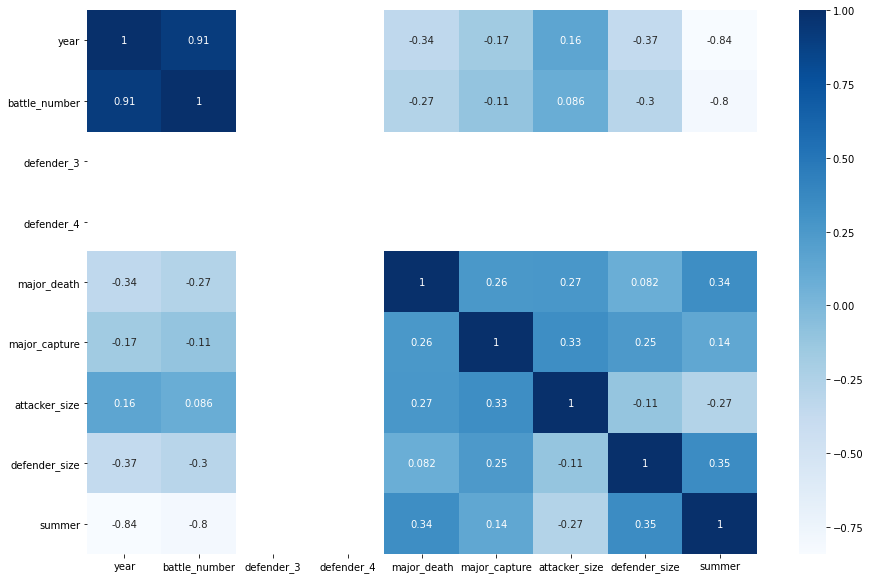

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
b_cor = battles.corr()
sns.heatmap(b_cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [10]:
battles['year'].unique()

array([298, 299, 300], dtype=int64)

In [11]:
by_year = battles.groupby("year")['name'].count()#["last_name"].count()

In [12]:
by_year.sort_values(ascending=True)

year
298     7
300    11
299    20
Name: name, dtype: int64

In [13]:
battles['attacker_king'].unique()

array(['Joffrey/Tommen Baratheon', 'Robb Stark', 'Balon/Euron Greyjoy',
       'Stannis Baratheon', nan], dtype=object)

In [14]:
by_king = battles.groupby(['attacker_king', 'defender_king'])['name'].count()

In [15]:
by_king

attacker_king             defender_king           
Balon/Euron Greyjoy       Balon/Euron Greyjoy          1
                          Joffrey/Tommen Baratheon     2
                          Robb Stark                   4
Joffrey/Tommen Baratheon  Balon/Euron Greyjoy          1
                          Robb Stark                  10
                          Stannis Baratheon            2
Robb Stark                Balon/Euron Greyjoy          1
                          Joffrey/Tommen Baratheon     9
Stannis Baratheon         Balon/Euron Greyjoy          1
                          Joffrey/Tommen Baratheon     2
                          Mance Rayder                 1
                          Renly Baratheon              1
Name: name, dtype: int64

In [16]:
battles.isna().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

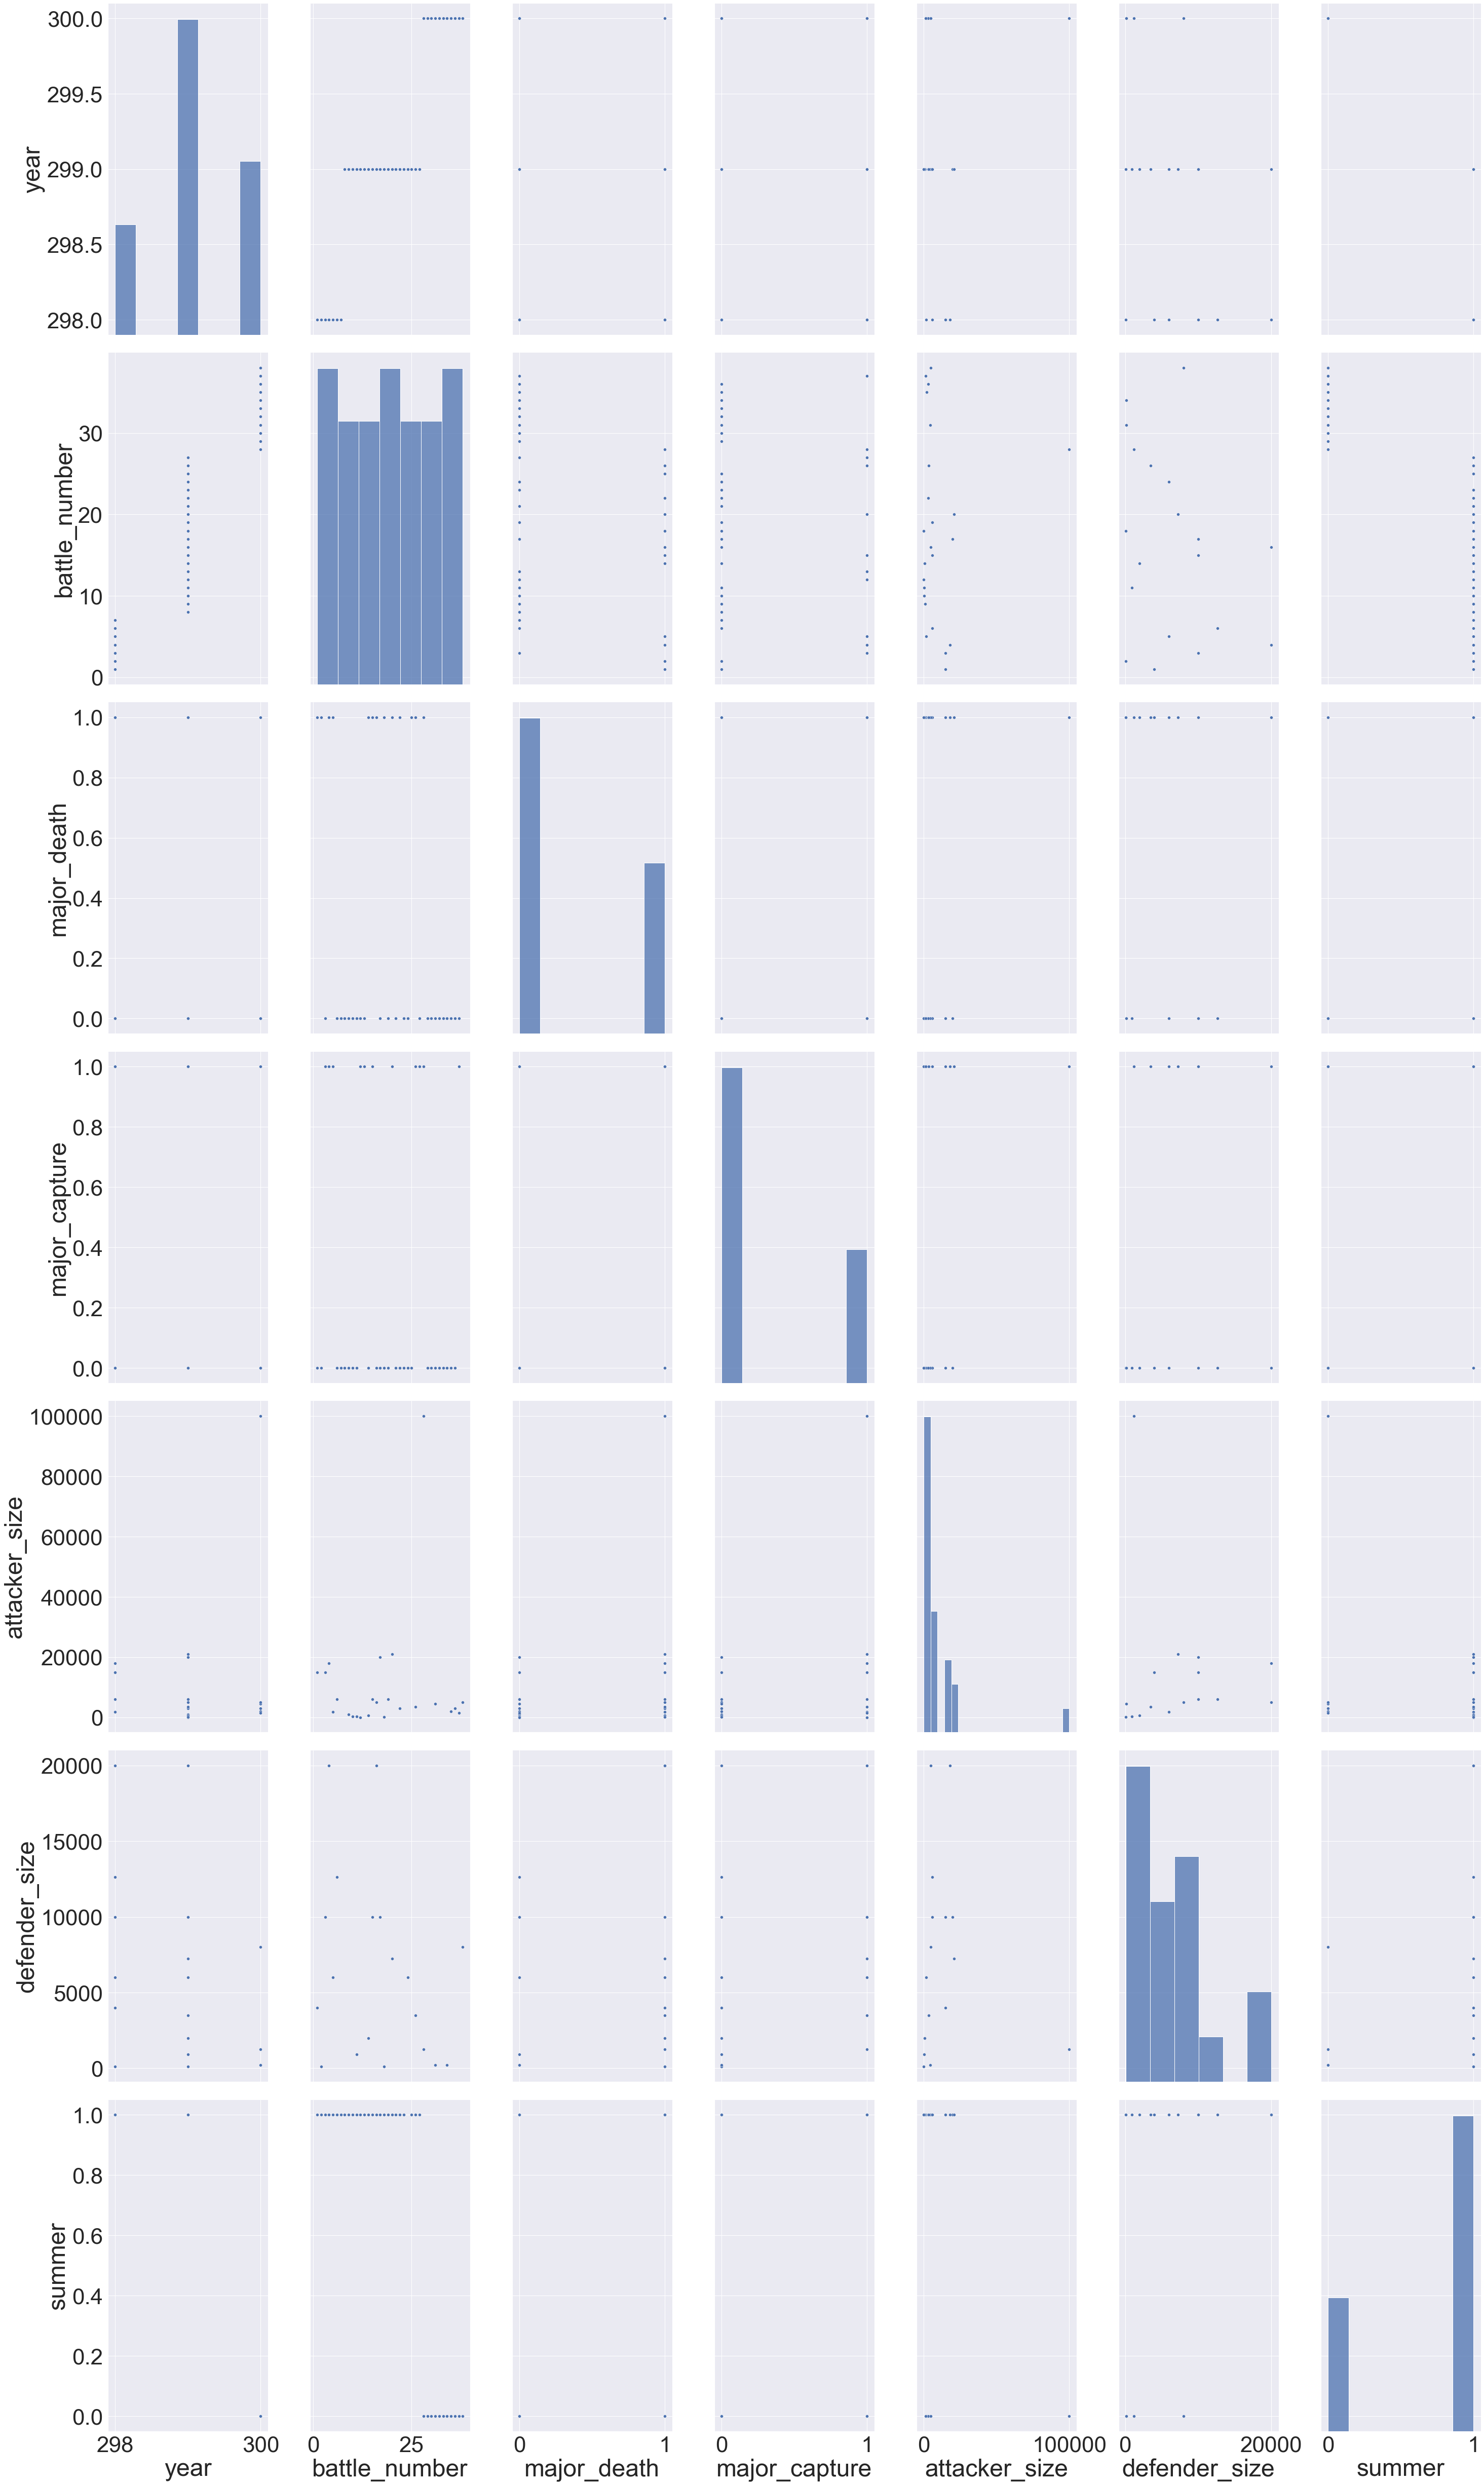

In [17]:
battles = battles.drop('defender_3', axis = 1)
battles = battles.drop('defender_4', axis = 1)

sns.set(font_scale=4) 
sns.pairplot(data=battles, height=10, aspect=0.6)

In [18]:
deaths.head()

Name      Allegiances  Death Year  Book of Death  \
0           Addam Marbrand        Lannister         NaN            NaN   
1  Aegon Frey (Jinglebell)             None       299.0            3.0   
2          Aegon Targaryen  House Targaryen         NaN            NaN   
3            Adrack Humble    House Greyjoy       300.0            5.0   
4           Aemon Costayne        Lannister         NaN            NaN   

   Death Chapter  Book Intro Chapter  Gender  Nobility  GoT  CoK  SoS  FfC  \
0            NaN                56.0       1         1    1    1    1    1   
1           51.0                49.0       1         1    0    0    1    0   
2            NaN                 5.0       1         1    0    0    0    0   
3           20.0                20.0       1         1    0    0    0    0   
4            NaN                 NaN       1         1    0    0    1    0   

   DwD  
0    0  
1    0  
2    1  
3    1  
4    0

In [19]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


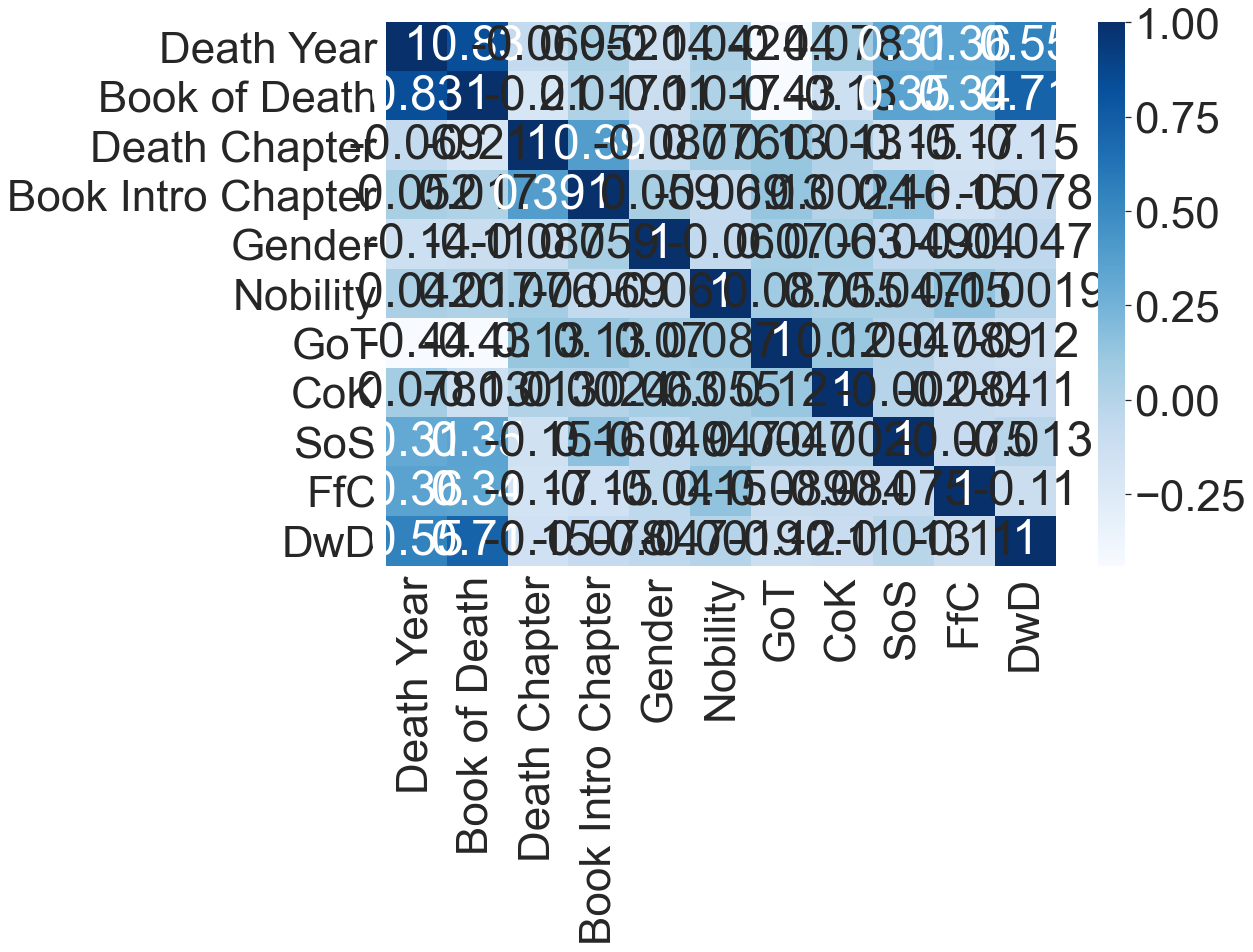

In [20]:
plt.figure(figsize=(15,10))
d_cor = deaths.corr()
sns.heatmap(d_cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [21]:
deaths_by_allegiances = deaths.groupby(['Allegiances'])['Name'].count()
deaths_by_allegiances.sort_values(ascending=True)

Allegiances
House Arryn          7
House Tully          8
House Baratheon      8
House Tyrell        11
House Martell       12
Tyrell              15
Targaryen           17
House Targaryen     19
House Lannister     21
Tully               22
Arryn               23
House Greyjoy       24
Martell             25
House Stark         35
Wildling            40
Greyjoy             51
Baratheon           56
Stark               73
Lannister           81
Night's Watch      116
None               253
Name: Name, dtype: int64

In [22]:
deaths_by_year = deaths.groupby(['Death Year','Allegiances'])['Name'].count()
deaths_by_year

Death Year  Allegiances    
297.0       Night's Watch       3
298.0       Arryn               1
            House Arryn         1
            House Baratheon     1
            House Lannister     3
            House Stark         9
            House Targaryen     1
            Lannister           3
            Night's Watch       2
            None                7
            Stark              10
            Targaryen           4
            Tully               1
            Wildling            3
299.0       Baratheon          16
            Greyjoy             6
            House Baratheon     2
            House Greyjoy      11
            House Lannister     4
            House Stark         9
            House Targaryen     1
            House Tully         5
            Lannister           8
            Night's Watch      33
            None               35
            Stark              17
            Tully               3
            Wildling            6
300.0       Arryn   

In [23]:
deaths.isna().sum()

Name                    0
Allegiances             0
Death Year            612
Book of Death         610
Death Chapter         618
Book Intro Chapter     12
Gender                  0
Nobility                0
GoT                     0
CoK                     0
SoS                     0
FfC                     0
DwD                     0
dtype: int64

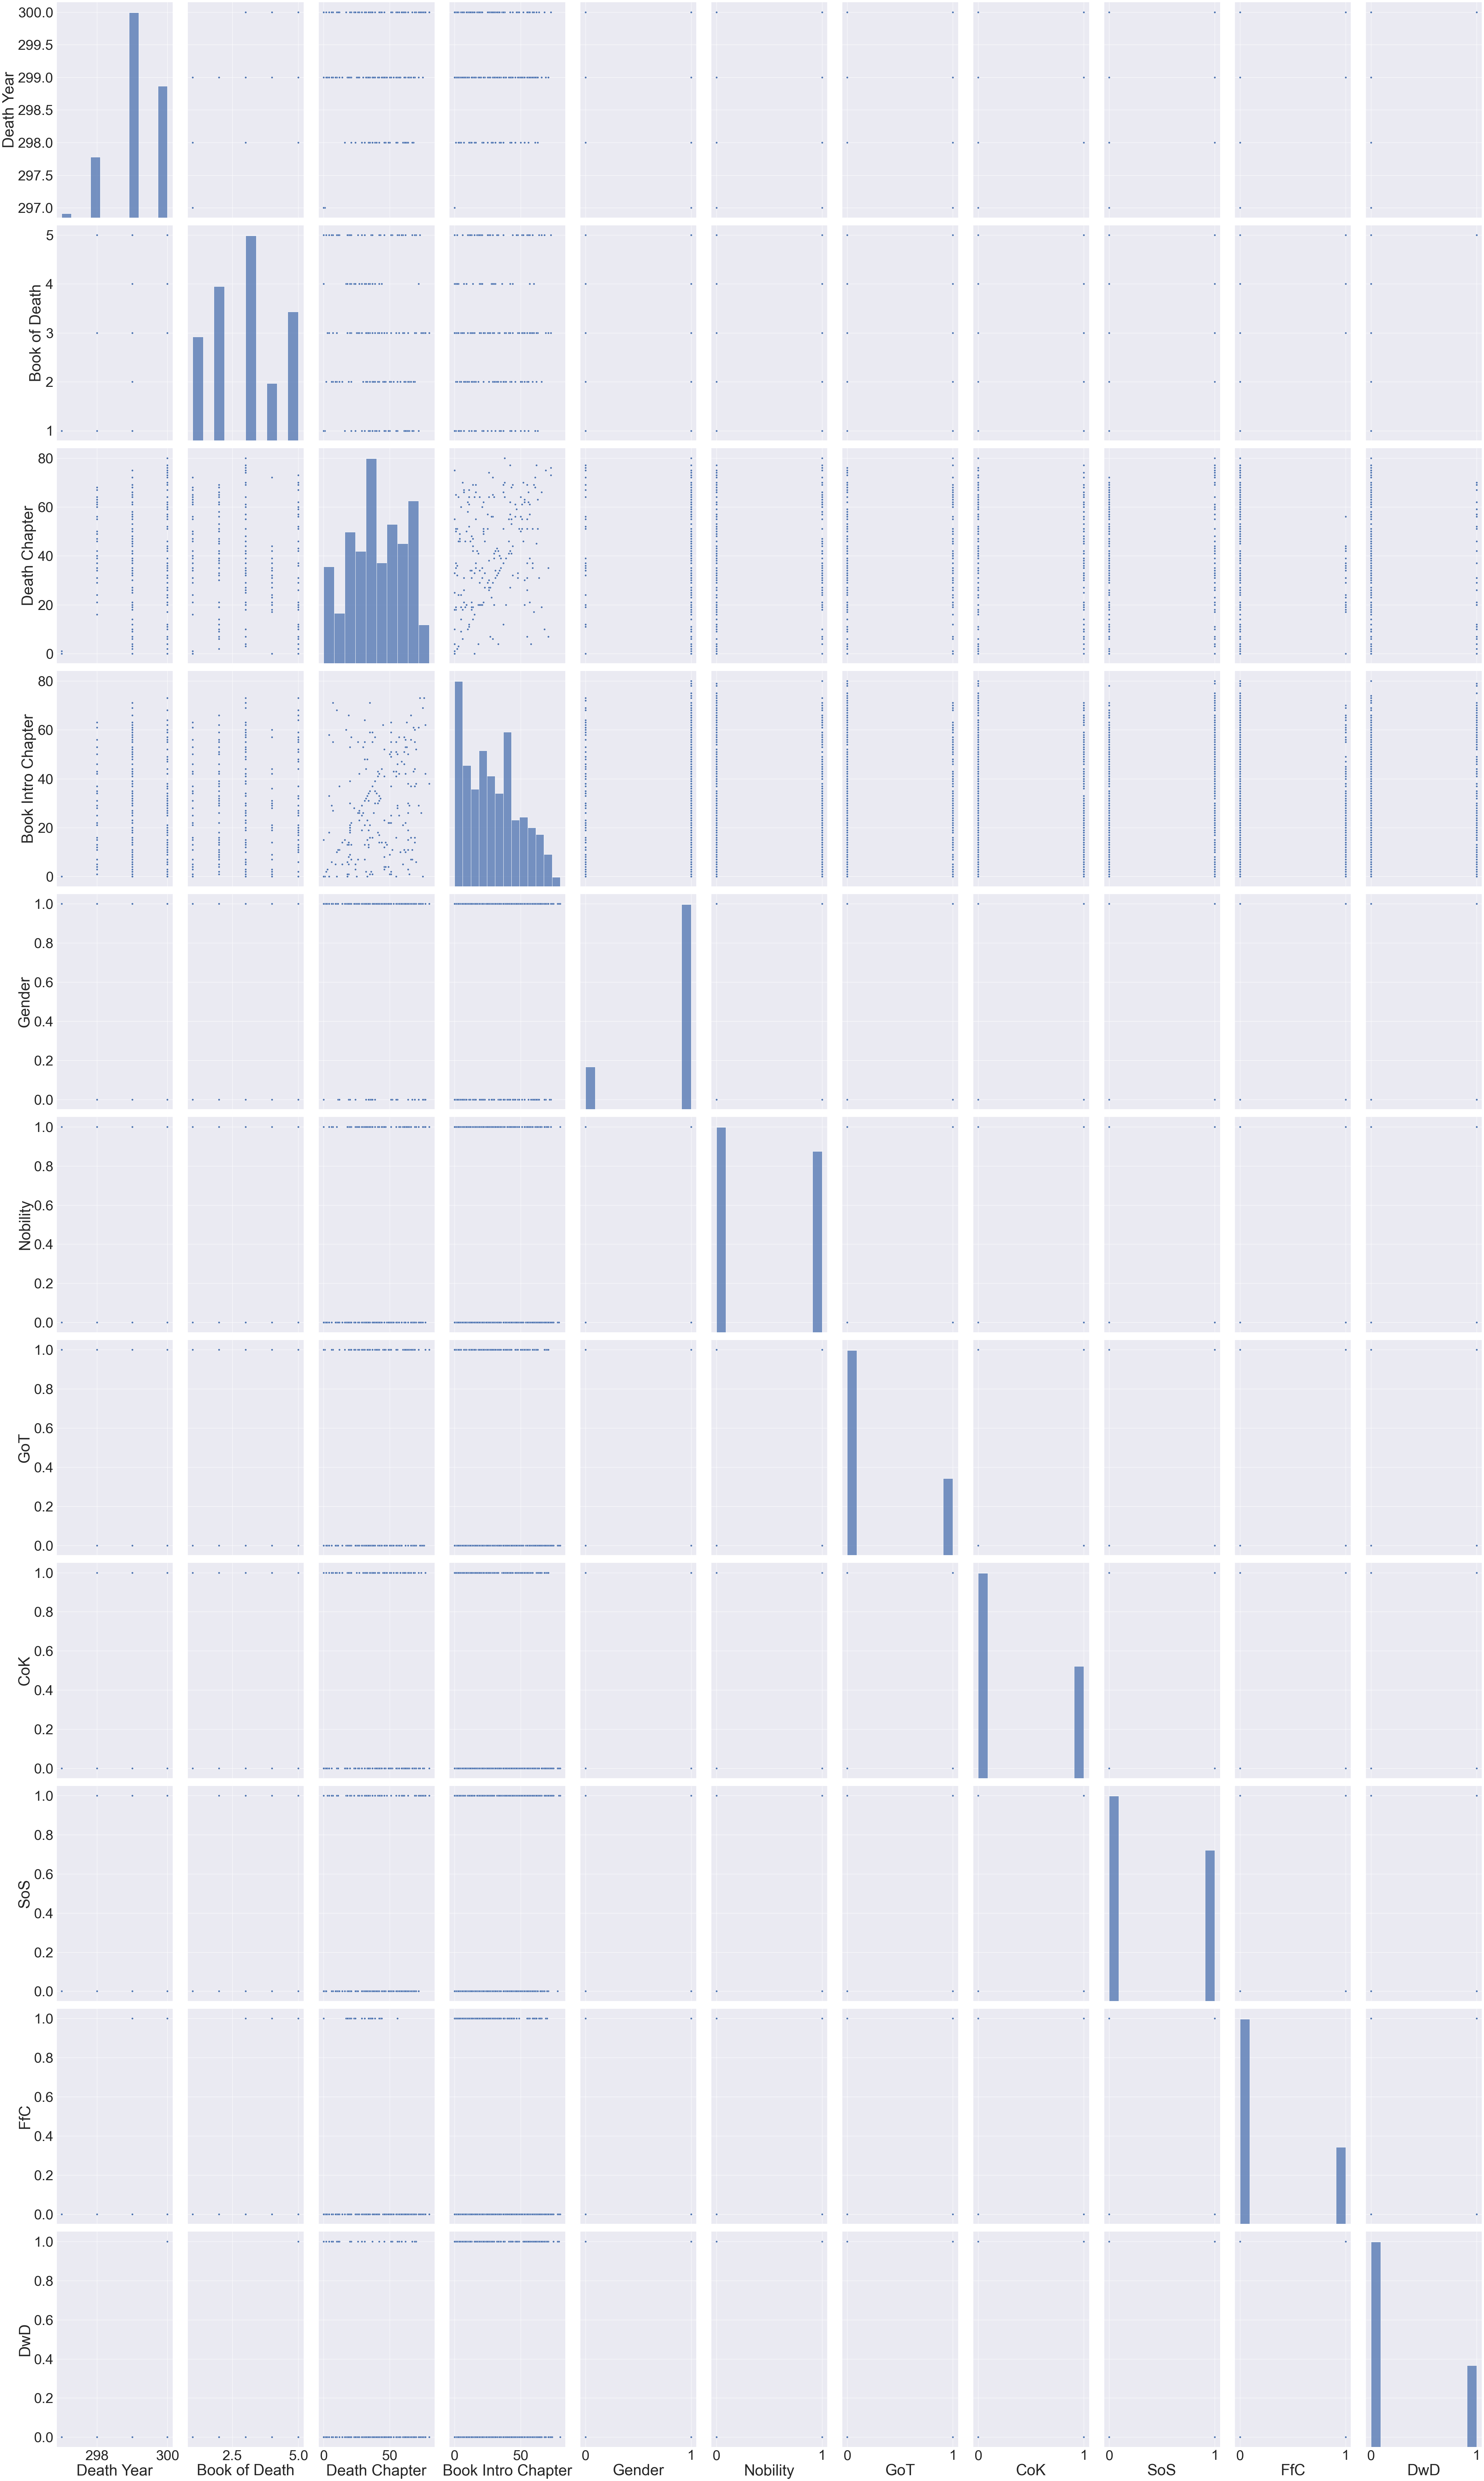

In [24]:
sns.set(font_scale=4) 
sns.pairplot(data=deaths, height=10, aspect=0.6)

In [25]:
import numpy as np
np.shape(character)

(1946, 33)

In [26]:
character.head()

S.No  actual  pred  alive   plod                  name  \
0     1       0     0  0.054  0.946  Viserys II Targaryen   
1     2       1     0  0.387  0.613           Walder Frey   
2     3       1     0  0.493  0.507          Addison Hill   
3     4       0     0  0.076  0.924           Aemma Arryn   
4     5       1     1  0.617  0.383        Sylva Santagar   

                  title  male   culture  dateOfBirth  ...  isAliveHeir  \
0                   NaN     1       NaN          NaN  ...          0.0   
1  Lord of the Crossing     1  Rivermen        208.0  ...          NaN   
2                   Ser     1       NaN          NaN  ...          NaN   
3                 Queen     0       NaN         82.0  ...          NaN   
4            Greenstone     0   Dornish        276.0  ...          NaN   

  isAliveSpouse isMarried isNoble   age numDeadRelations  boolDeadRelations  \
0           NaN         0       0   NaN               11                  1   
1           1.0         1       1  97.0                1                  1   
2           NaN         0       1   NaN                0                  0   
3           0.0         1       1  23.0                0                  0   
4           1.0         1       1  29.0                0                  0   

   isPopular  popularity  isAlive  
0          1    0.605351        0  
1          1    0.896321        1  
2          0    0.267559        1  
3          0    0.183946        0  
4          0    0.043478        1  

[5 rows x 33 columns]

In [27]:
character.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

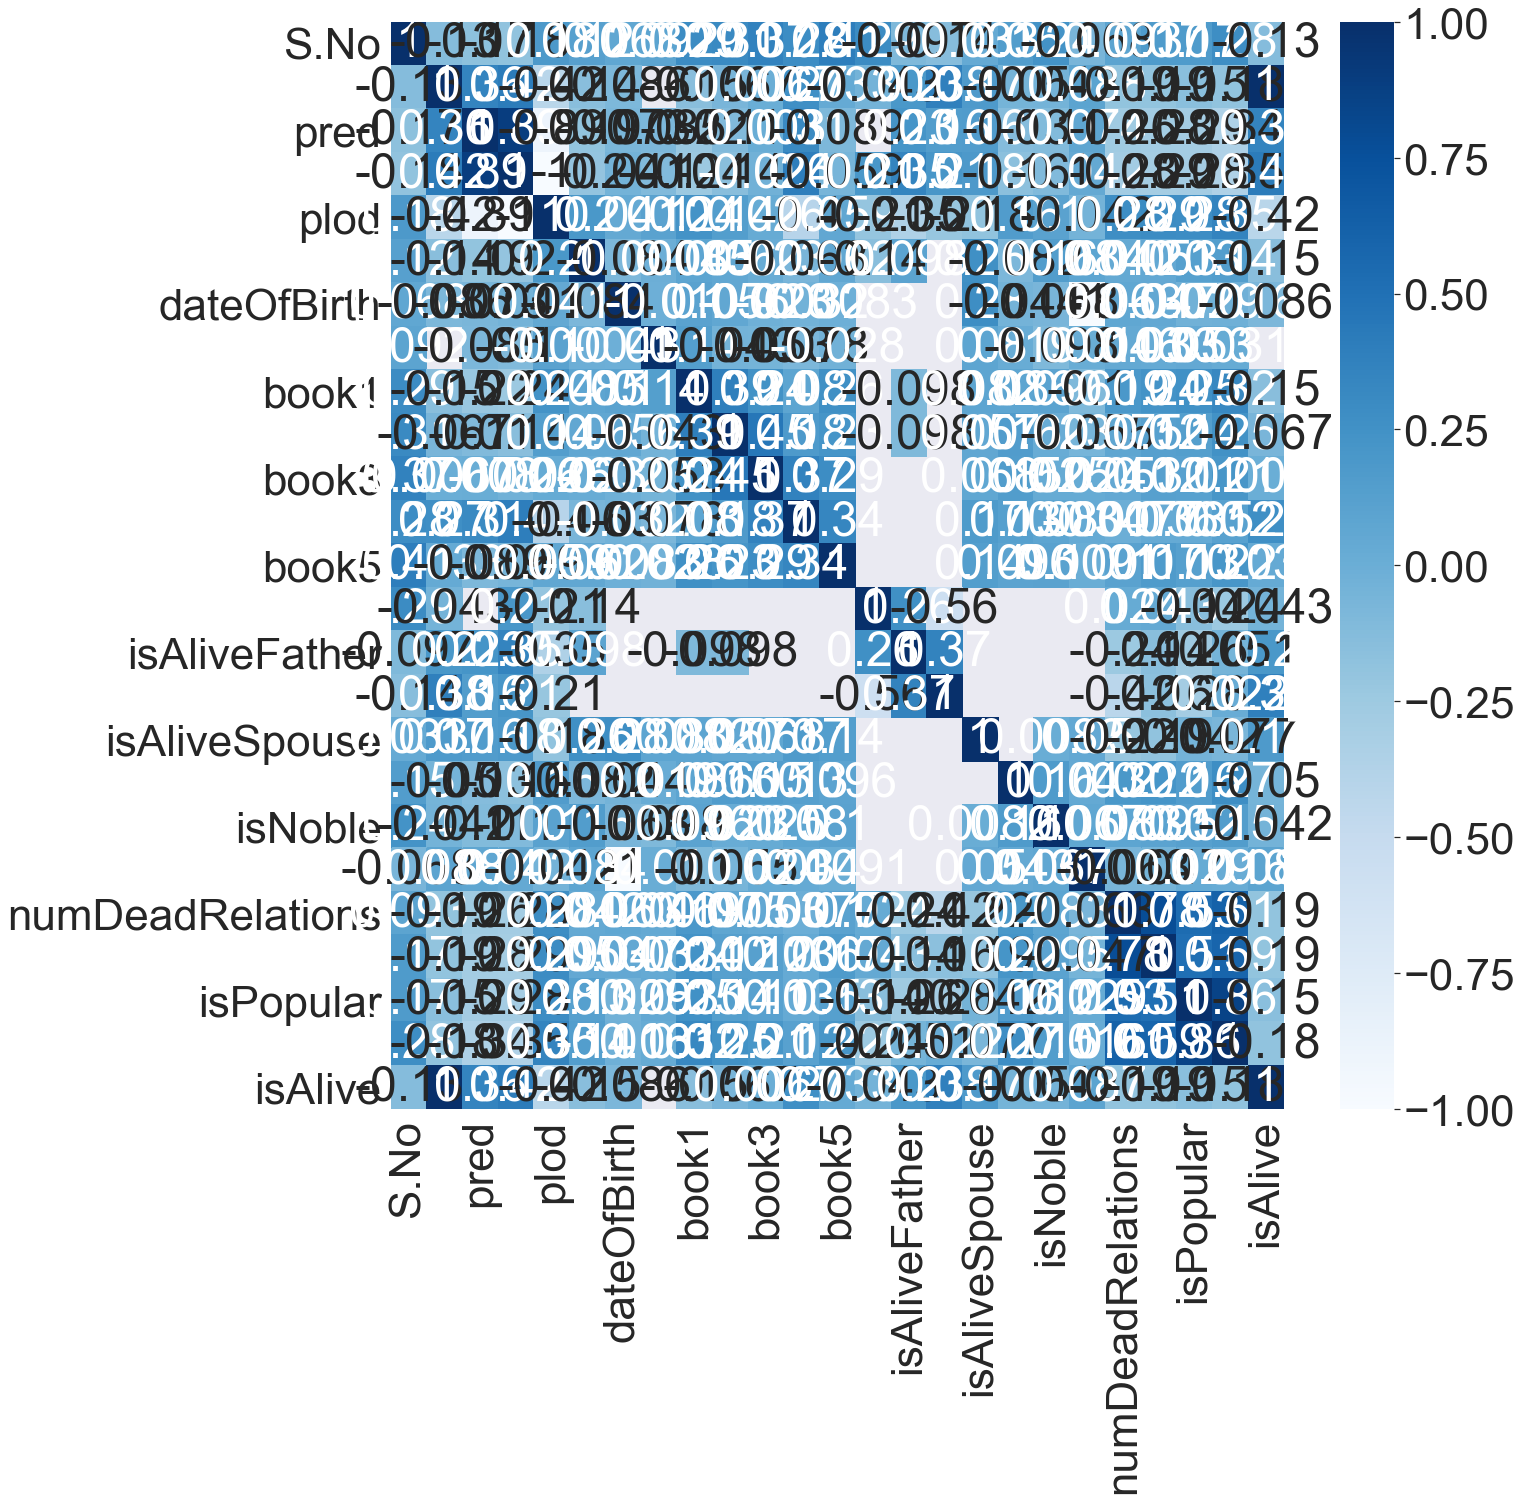

In [28]:
plt.figure(figsize=(20,20))
c_cor = character.corr()
sns.heatmap(c_cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [29]:
character.isna().sum()

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [30]:
sns.set(font_scale=4) 
sns.pairplot(data=character, height=10, aspect=0.6)